In [1]:
!pip install ultralytics matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
model = YOLO('model/BestModel-570.pt')  # Replace with your model's path

# Test on Low Peak Hours (3:49 AM)


image 1/1 /Users/babono/Development/ind5003-traffic-analysis/data/hourly_interval/2701_2024-10-12_03-49-34.jpg: 480x800 2 vehicle-causeway-johors, 7 vehicle-causeway-singapores, 159.5ms
Speed: 13.7ms preprocess, 159.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)


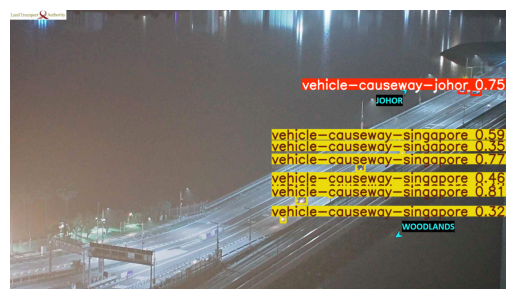

vehicle-causeway-singapore: 7 vehicles
vehicle-causeway-johor: 2 vehicles


In [7]:
# Load your image
image_path = 'data/hourly_interval/2701_2024-10-12_03-49-34.jpg'  # Replace with your image path
results = model(image_path)  # Perform inference

# Get the annotated image
annotated_image = results[0].plot()  # YOLOv8 has a method to plot the results

# Display the image using matplotlib
plt.imshow(annotated_image)
plt.axis('off')  # Hide axes
plt.show()

# Extract the class labels from the results
labels = results[0].boxes.cls  # Class indices

# Count the number of occurrences of each label
label_counts = Counter(labels.tolist())

# Map class indices to class names (you can modify this mapping based on your labels)
class_names = model.names  # Retrieve class names from the model
for class_index, count in label_counts.items():
    print(f"{class_names[int(class_index)]}: {count} vehicles")

# Test on High Peak Hours (16:08 PM)


image 1/1 /Users/babono/Development/ind5003-traffic-analysis/data/hourly_interval/2701_2024-10-12_16-08-57.jpg: 480x800 61 vehicle-causeway-johors, 97 vehicle-causeway-singapores, 148.7ms
Speed: 7.8ms preprocess, 148.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 800)


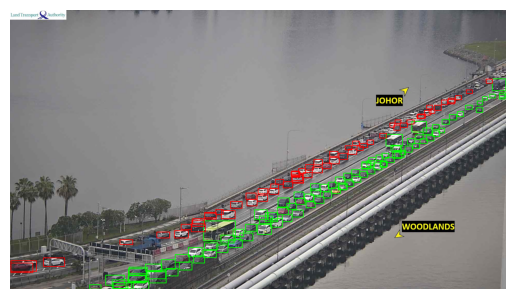

vehicle-causeway-singapore: 97 vehicles
vehicle-causeway-johor: 61 vehicles


In [11]:
# Load your image
image_path = 'data/hourly_interval/2701_2024-10-12_16-08-57.jpg'  # Replace with your image path
results = model(image_path)  # Perform inference

# Load the original image
image = cv2.imread(image_path)

# Get the bounding boxes and class labels from the results
boxes = results[0].boxes.xyxy  # Bounding box coordinates
labels = results[0].boxes.cls  # Class indices

# Define colors for each class
class_colors = {
    0: (0, 0, 255),   # Blue for class 0
    1: (0, 255, 0),   # Green for class 1
    2: (255, 0, 0),   # Red for class 2
    3: (255,215,0),   # Orange for class 3    
}

# Draw bounding boxes with different colors for each class
for box, label in zip(boxes, labels):
    x1, y1, x2, y2 = map(int, box[:4])  # Convert box coordinates to integers
    color = class_colors.get(int(label), (255, 255, 255))  # Default to white if class not in class_colors
    thickness = 2  # Thickness of the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

# Convert image from BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

# Extract the class labels from the results
labels = results[0].boxes.cls  # Class indices

# Count the number of occurrences of each label
label_counts = Counter(labels.tolist())

# Map class indices to class names (you can modify this mapping based on your labels)
class_names = model.names  # Retrieve class names from the model
for class_index, count in label_counts.items():
    print(f"{class_names[int(class_index)]}: {count} vehicles")